# Бизнес-кейс оценки эффективности участия Партнера в акции с программой лояльности

<a id="Начало"></a>

<div style="border:solid black 2px; padding: 20px">

Цель акции: привлечение новых клиентов, увеличение среднего чека и транзакционной активности.

* Начало акции: 1 октября 2023 г.
* Продолжительность акции, месяцев: 2
* Механика акции cashback (%): 8%
* Для покупок на сумму от: 1000
* Категория: АЗС

Исходные данные: Статистика по использованию безналичных карт по участникам программы в регионах присутствия Партнера1.

1. [Загрузка данных](#Загрузка)
2. [Средний чек](#Средний_чек)
3. [Количество визитов в месяц](#Количество_визитов)
4. [Количество участников акции](#Количество_участников)
5. [Оборот учатников акции](#Оборот)
6. [Расходы](#Расходы)
7. [Итоги](#Итоги)

<div>

[Начало](#Начало)

<a id="Загрузка"></a>

## Загрузка данных

In [1]:
import pandas as pd
from plotly import graph_objects as go

In [2]:
data = {'Регион':['БАШКОРТОСТАН РЕСПУБЛИКА','ВЛАДИМИРСКАЯ ОБЛАСТЬ','КУРГАНСКАЯ ОБЛАСТЬ','МОРДОВИЯ РЕСПУБЛИКА',
         'НИЖЕГОРОДСКАЯ ОБЛАСТЬ','ОРЕНБУРГСКАЯ ОБЛАСТЬ','САМАРСКАЯ ОБЛАСТЬ','САРАТОВСКАЯ ОБЛАСТЬ',
         'СВЕРДЛОВСКАЯ ОБЛАСТЬ','ТАТАРСТАН РЕСПУБЛИКА','УДМУРТСКАЯ РЕСПУБЛИКА','УЛЬЯНОВСКАЯ ОБЛАСТЬ',
         'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ','ЧУВАШСКАЯ РЕСПУБЛИКА'], 
        
        'Кол-во торговых точек партнера 1':[271,4,16,11,2,87,14,8,36,3,48,8,31,6],
        
        'Клиентская база участников':[1023700,347000,218500,222000,879700,564300,801600,650500,1003100,
                                      1083900,457000,320400,657300,287400],
        
        'Средний чек в категории в регионе':[778.10421815334,925.18790429287,741.666822937371,724.726986139121,
                                             852.529589415732,735.147356542655,790.878113438696,715.930538128138,
                                             840.423352858285,746.174222059049,758.123819525079,682.917165947776,
                                             751.86708871007,746.989736243304],
        
        'Средний чек Партнера в регионе':[756.180213253387,854.54,669.565116784356,631.203543956044,724.826470588235,
                                          729.857820806599,740.45141434263,788.696069692058,743.452681260135,
                                          447.105652173913, 661.552173490856,671.092253164557,672.561157948197,
                                          563.107346241458],
        
        'Количество визитов в мес. в категории':[1.84946873182851,1.79551794151692,2.09375,2.17473632914477,
                                                 2.16822985298297,2.13351253484988,2.1518699240241,2.09312561128965,
                                                 2.14497079264913,2.02541163972987,2.08104216746795,2.36574438125194,
                                                 2.07541210574136,2.30867503372716],
        
        'Количество визитов в мес. по Партнеру':[1.3420762953122,1.0952380952381,1.4496062992126,1.40948693126815,
                                                 1.21428571428571,1.35759838233007,1.23950617283951,1.41028571428571,
                                                 1.50706929656135,1.4375,1.37189165186501,1.3481228668942,
                                                 1.39794107206248,1.74900398406375],
        
        'Доля рынка Партнера в регионе':[0.421043368789167,0.00506133981259159,0.0337473097952717,0.0442585404203163,
                                         0.00276516241997829,0.10312745956516,0.00769703589812614,0.014301442988018,
                                         0.0357896476607128,0.00471034694300102,0.0691250879379568,0.00643816651527606,
                                         0.0268967410041751,0.0131211120382369],
        
        'Доля покупателей топлива в регионе':[0.121929176411678,0.173522627258555,0.250517707478332,0.225443284086014,
                                              0.253337287951006,0.219698455277033,0.234510745786575,0.213890860886154,
                                              0.243472653000744,0.171756502472284,0.210256431176418,0.272599269755596,
                                              0.202283215282249,0.240217915614448],
        
        'Доля чеков от порога по сумме':[0.5,0.564110767938617,0.386547059035245,0.422255704290285,0.529805558640929,
                                         0.51256005680133,0.437553319193972,0.328719281737533,0.521943996775438,0.398251207189362,
                                         0.505493921892291,0.34568573285214,0.434338988378164,0.486976218527224],
       }

In [3]:
data = pd.DataFrame(data)
data['Регион'] = data['Регион'].str.split(r' ').str[0]

In [4]:
data.style.format({'Средний чек в категории в регионе':'{:.1f}', 'Средний чек Партнера в регионе':'{:.1f}',
                   'Количество визитов в мес. по Партнеру':'{:.2f}', 'Количество визитов в мес. в категории':'{:.2f}',
                    'Доля рынка Партнера в регионе':'{:,.1%}', 'Доля покупателей топлива в регионе':'{:,.1%}',
                    'Доля чеков от порога по сумме':'{:,.1%}'})\
    .background_gradient(cmap='Blues', axis=0)

,Регион,Кол-во торговых точек партнера 1,Клиентская база участников,Средний чек в категории в регионе,Средний чек Партнера в регионе,Количество визитов в мес. в категории,Количество визитов в мес. по Партнеру,Доля рынка Партнера в регионе,Доля покупателей топлива в регионе,Доля чеков от порога по сумме
0,БАШКОРТОСТАН,271,1023700,778.1,756.2,1.85,1.34,42.1%,12.2%,50.0%
1,ВЛАДИМИРСКАЯ,4,347000,925.2,854.5,1.80,1.10,0.5%,17.4%,56.4%
2,КУРГАНСКАЯ,16,218500,741.7,669.6,2.09,1.45,3.4%,25.1%,38.7%
3,МОРДОВИЯ,11,222000,724.7,631.2,2.17,1.41,4.4%,22.5%,42.2%
4,НИЖЕГОРОДСКАЯ,2,879700,852.5,724.8,2.17,1.21,0.3%,25.3%,53.0%
5,ОРЕНБУРГСКАЯ,87,564300,735.1,729.9,2.13,1.36,10.3%,22.0%,51.3%
6,САМАРСКАЯ,14,801600,790.9,740.5,2.15,1.24,0.8%,23.5%,43.8%
7,САРАТОВСКАЯ,8,650500,715.9,788.7,2.09,1.41,1.4%,21.4%,32.9%
8,СВЕРДЛОВСКАЯ,36,1003100,840.4,743.5,2.14,1.51,3.6%,24.3%,52.2%
9,ТАТАРСТАН,3,1083900,746.2,447.1,2.03,1.44,0.5%,17.2%,39.8%


[Начало](#Начало)

<a id="Средний_чек"></a>

## Средний чек

<div style="border:solid black 2px; padding: 20px">

Посмотрим на разницу среднего чека Партнера к среднему чеку категории в разрезе регионов.

<div>

In [5]:
data_avg = data[['Регион', 'Средний чек в категории в регионе', 'Средний чек Партнера в регионе']].T
data_avg.loc['Разница'] = (((data_avg.loc['Средний чек Партнера в регионе'] / data_avg.loc['Средний чек в категории в регионе'])
                           - 1) * 100).map("{:,.1f}%".format)

data_avg = data_avg.map(lambda x: round(x, 1) if isinstance(x, (int, float)) else x)
data_avg

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Регион,БАШКОРТОСТАН,ВЛАДИМИРСКАЯ,КУРГАНСКАЯ,МОРДОВИЯ,НИЖЕГОРОДСКАЯ,ОРЕНБУРГСКАЯ,САМАРСКАЯ,САРАТОВСКАЯ,СВЕРДЛОВСКАЯ,ТАТАРСТАН,УДМУРТСКАЯ,УЛЬЯНОВСКАЯ,ЧЕЛЯБИНСКАЯ,ЧУВАШСКАЯ
Средний чек в категории в регионе,778.1,925.2,741.7,724.7,852.5,735.1,790.9,715.9,840.4,746.2,758.1,682.9,751.9,747.0
Средний чек Партнера в регионе,756.2,854.5,669.6,631.2,724.8,729.9,740.5,788.7,743.5,447.1,661.6,671.1,672.6,563.1
Разница,-2.8%,-7.6%,-9.7%,-12.9%,-15.0%,-0.7%,-6.4%,10.2%,-11.5%,-40.1%,-12.7%,-1.7%,-10.5%,-24.6%


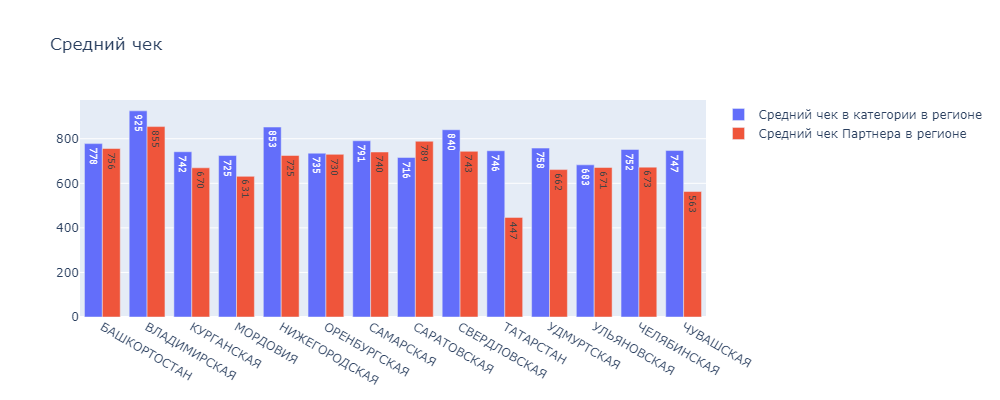

In [6]:
# строим столбчатую диаграмму 
fig_avg = go.Figure()
fig_avg.add_trace(go.Bar(x=data['Регион'], y=data['Средний чек в категории в регионе'], 
                           name='Средний чек в категории в регионе', text = data['Средний чек в категории в регионе'].round()))
fig_avg.add_trace(go.Bar(x=data['Регион'], y=data['Средний чек Партнера в регионе'],
                           name='Средний чек Партнера в регионе', text = data['Средний чек Партнера в регионе'].round()))
fig_avg.update_layout(title_text='Средний чек', height=400,width=1000)
fig_avg.show('png')

<div style="border:solid green 2px; padding: 20px">

Самый высокий средний чек во Владимирской области, самый низкий средний чек в Татарстане, доля рынка в данных региона 0,5%, есть точки для роста есть, но в ближайшее время будет небольшой эффект на бизнес.

Большинство заправок и большая доля рынка Партнера1 в Республике Башкортостан, поэтому показатели данного региона будут иметь большее влияние на итоги акции. Средний чек Партнера1 в данном регионе на -2,8% меньше среднего чека категории в регионе.

В некоторых регионах средний чек Партнера1 ниже более чем на 10% среднего чека в категории, так как у нас нет информации по форматам АЗС (есть ли продажа сопутствующего товара или нет), то нет уверенности, что у клиентов в данных регионах будет возможность "добивать" чек до 1000р.

<div>

[Начало](#Начало)

<a id="Количество_визитов"></a>

## Количество визитов в месяц

<div style="border:solid black 2px; padding: 20px">

Посмотрим на разницу количества визитов в мес. у Партнера1 к количеству визитов в мес. в разрезе регионов.

<div>

In [7]:
data_visit = data[['Регион', 'Количество визитов в мес. в категории', 'Количество визитов в мес. по Партнеру']].T
data_visit.loc['Разница'] = (((data_visit.loc['Количество визитов в мес. по Партнеру']
                               / data_visit.loc['Количество визитов в мес. в категории'])
                               - 1) * 100).map("{:,.1f}%".format)

data_visit = data_visit.map(lambda x: round(x, 1) if isinstance(x, (int, float)) else x)
data_visit

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Регион,БАШКОРТОСТАН,ВЛАДИМИРСКАЯ,КУРГАНСКАЯ,МОРДОВИЯ,НИЖЕГОРОДСКАЯ,ОРЕНБУРГСКАЯ,САМАРСКАЯ,САРАТОВСКАЯ,СВЕРДЛОВСКАЯ,ТАТАРСТАН,УДМУРТСКАЯ,УЛЬЯНОВСКАЯ,ЧЕЛЯБИНСКАЯ,ЧУВАШСКАЯ
Количество визитов в мес. в категории,1.8,1.8,2.1,2.2,2.2,2.1,2.2,2.1,2.1,2.0,2.1,2.4,2.1,2.3
Количество визитов в мес. по Партнеру,1.3,1.1,1.4,1.4,1.2,1.4,1.2,1.4,1.5,1.4,1.4,1.3,1.4,1.7
Разница,-27.4%,-39.0%,-30.8%,-35.2%,-44.0%,-36.4%,-42.4%,-32.6%,-29.7%,-29.0%,-34.1%,-43.0%,-32.6%,-24.2%


<div style="border:solid green 2px; padding: 20px">

Количество визитов в мес. у Партнера1 значительно ниже чем количество визитов в категории. 

Даже в Республике Башкортостан, где доля рынка Партера1 42.1%.

Можно предположить, что у конкурентов уже настроена программа лояльности, которая увеличивает количество визитов в месяц. 

<div>

[Начало](#Начало)

<a id="Количество_участников"></a>

## Количество участников акции

<div style="border:solid black 2px; padding: 20px">

Предположим, какое количество участников может быть в акцию.

<div>

In [8]:
data['Оптимистичное количество потенциальных участников акции'] = (data['Клиентская база участников']
                                                                   * data['Доля рынка Партнера в регионе']
                                                                   * data['Доля покупателей топлива в регионе']).round()

coeff_paying = 0.3 # гипотетический коэффициентов реальных участников акции от оптимистичного числа участников

data['Количество уникальных участников акции 1 мес.'] = (data['Оптимистичное количество потенциальных участников акции']
                                                            * data['Доля чеков от порога по сумме']
                                                            * coeff_paying).round()

data['Количество уникальных участников акции 2 мес.'] = data['Количество уникальных участников акции 1 мес.']

In [9]:
# гипотетический коэффициент снижения количества участников после акции
after_1m = 0.8
after_2m = 0.5 # доп. сезонное снижение
after_3m = 0.4 # доп. сезонное снижение

data['Количество уникальных участников после акции 1 мес.'] = data['Количество уникальных участников акции 2 мес.'] * after_1m
data['Количество уникальных участников после акции 2 мес.'] = data['Количество уникальных участников акции 2 мес.'] * after_2m 
data['Количество уникальных участников после акции 3 мес.'] = data['Количество уникальных участников акции 2 мес.'] * after_3m

In [10]:
data[['Кол-во торговых точек партнера 1', 'Клиентская база участников',
     'Оптимистичное количество потенциальных участников акции', 'Количество уникальных участников акции 1 мес.',
     'Количество уникальных участников акции 2 мес.', 'Количество уникальных участников после акции 1 мес.',
     'Количество уникальных участников после акции 2 мес.', 'Количество уникальных участников после акции 3 мес.']]

,Кол-во торговых точек партнера 1,Клиентская база участников,Оптимистичное количество потенциальных участников акции,Количество уникальных участников акции 1 мес.,Количество уникальных участников акции 2 мес.,Количество уникальных участников после акции 1 мес.,Количество уникальных участников после акции 2 мес.,Количество уникальных участников после акции 3 мес.
0,271,1023700,52554.0,7883.0,7883.0,6306.4,3941.5,3153.2
1,4,347000,305.0,52.0,52.0,41.6,26.0,20.8
2,16,218500,1847.0,214.0,214.0,171.2,107.0,85.6
3,11,222000,2215.0,281.0,281.0,224.8,140.5,112.4
4,2,879700,616.0,98.0,98.0,78.4,49.0,39.2
5,87,564300,12785.0,1966.0,1966.0,1572.8,983.0,786.4
6,14,801600,1447.0,190.0,190.0,152.0,95.0,76.0
7,8,650500,1990.0,196.0,196.0,156.8,98.0,78.4
8,36,1003100,8741.0,1369.0,1369.0,1095.2,684.5,547.6
9,3,1083900,877.0,105.0,105.0,84.0,52.5,42.0


[Начало](#Начало)

<a id="Оборот"></a>

## Оборот учатников акции

<div style="border:solid black 2px; padding: 20px">

Предположим, что потенциальные участники программы будут совершать покупку на сумму 1000р. 'Количество визитов в мес. в категории' раз, а не 'Количество визитов в мес. по Партнеру'.

Для расчета суммы покупок после акции возьмем средний чек Партнера1 до акции, но 'Количество визитов в мес. в категории'.

<div>

In [11]:
amount_from = 1000
data['Сумма покупок участником в мес. акции'] = data['Количество визитов в мес. в категории'] * amount_from

In [12]:
data['Прогноз оборота участниками в 1 мес. акции'] = round(data['Сумма покупок участником в мес. акции']
                                              * data['Количество уникальных участников акции 1 мес.'], 0)
data['Прогноз оборота участниками в 2 мес. акции'] = round(data['Сумма покупок участником в мес. акции']
                                              * data['Количество уникальных участников акции 2 мес.'], 0)

In [13]:
data['Сумма покупок участником в мес. после акции'] = (data['Количество визитов в мес. в категории']
                                                       * data['Средний чек Партнера в регионе'])

In [14]:
data['Прогноз оборота участниками в 1 мес. после акции'] = round(data['Количество уникальных участников после акции 1 мес.']
                                                            * data['Сумма покупок участником в мес. после акции'], 0)
data['Прогноз оборота участниками в 2 мес. после акции'] = round(data['Количество уникальных участников после акции 2 мес.']
                                                            * data['Сумма покупок участником в мес. после акции'], 0)
data['Прогноз оборота участниками в 3 мес. после акции'] = round(data['Количество уникальных участников после акции 3 мес.']
                                                            * data['Сумма покупок участником в мес. после акции'], 0)

In [15]:
data['Итого прогноз оборота 2 мес. акции'] = data[['Прогноз оборота участниками в 1 мес. акции',
                                                   'Прогноз оборота участниками в 2 мес. акции']].sum(axis=1)
data['Итого прогноз оборота 3 мес. после акции'] = data[['Прогноз оборота участниками в 1 мес. после акции',
                                                         'Прогноз оборота участниками в 2 мес. после акции',
                                                         'Прогноз оборота участниками в 3 мес. после акции']].sum(axis=1)
data['Итого прогноз оборота'] = data[['Итого прогноз оборота 2 мес. акции',
                                      'Итого прогноз оборота 3 мес. после акции']].sum(axis=1)

In [16]:
data[['Прогноз оборота участниками в 1 мес. акции', 'Прогноз оборота участниками в 2 мес. акции',
     'Прогноз оборота участниками в 1 мес. после акции', 'Прогноз оборота участниками в 2 мес. после акции',
     'Прогноз оборота участниками в 3 мес. после акции', 'Итого прогноз оборота 2 мес. акции',
     'Итого прогноз оборота 3 мес. после акции', 'Итого прогноз оборота']]

,Прогноз оборота участниками в 1 мес. акции,Прогноз оборота участниками в 2 мес. акции,Прогноз оборота участниками в 1 мес. после акции,Прогноз оборота участниками в 2 мес. после акции,Прогноз оборота участниками в 3 мес. после акции,Итого прогноз оборота 2 мес. акции,Итого прогноз оборота 3 мес. после акции,Итого прогноз оборота
0,14579362.0,14579362.0,8819700.0,5512313.0,4409850.0,29158724.0,18741863.0,47900587.0
1,93367.0,93367.0,63829.0,39893.0,31914.0,186734.0,135636.0,322370.0
2,448062.0,448062.0,240006.0,150004.0,120003.0,896124.0,510013.0,1406137.0
3,611101.0,611101.0,308583.0,192865.0,154292.0,1222202.0,655740.0,1877942.0
4,212487.0,212487.0,123213.0,77008.0,61606.0,424974.0,261827.0,686801.0
5,4194486.0,4194486.0,2449103.0,1530689.0,1224551.0,8388972.0,5204343.0,13593315.0
6,408855.0,408855.0,242190.0,151369.0,121095.0,817710.0,514654.0,1332364.0
7,410253.0,410253.0,258852.0,161782.0,129426.0,820506.0,550060.0,1370566.0
8,2936465.0,2936465.0,1746498.0,1091561.0,873249.0,5872930.0,3711308.0,9584238.0
9,212668.0,212668.0,76068.0,47543.0,38034.0,425336.0,161645.0,586981.0


[Начало](#Начало)

<a id="Расходы"></a>

## Расходы

<div style="border:solid black 2px; padding: 20px">

Кэшбэк 8%.

Зададим предполагаемую комиссию 3%.

<div>

In [17]:
cashback = 0.08
commission = 0.03 # предполагаемая комиссия
cash_comm = cashback + commission

In [18]:
data['Расходы в 1 мес. акции'] = round(data['Прогноз оборота участниками в 1 мес. акции'] * cash_comm, 0)
data['Расходы в 2 мес. акции'] = round(data['Прогноз оборота участниками в 2 мес. акции'] * cash_comm, 0)
data['Итого расходы'] =  data[['Расходы в 1 мес. акции',
                               'Расходы в 2 мес. акции']].sum(axis=1)

In [19]:
data[['Расходы в 1 мес. акции', 'Расходы в 2 мес. акции', 'Итого расходы']]

,Расходы в 1 мес. акции,Расходы в 2 мес. акции,Итого расходы
0,1603730.0,1603730.0,3207460.0
1,10270.0,10270.0,20540.0
2,49287.0,49287.0,98574.0
3,67221.0,67221.0,134442.0
4,23374.0,23374.0,46748.0
5,461393.0,461393.0,922786.0
6,44974.0,44974.0,89948.0
7,45128.0,45128.0,90256.0
8,323011.0,323011.0,646022.0
9,23393.0,23393.0,46786.0


[Начало](#Начало)

<a id="Итоги"></a>

## Итоги

<div style="border:solid black 2px; padding: 20px">

Ниже итоговые расчетные данные по Партнеру1.

<div>

In [20]:
data['Итого'] = 'Итого'

In [21]:
data_total = data.pivot_table(index= 'Итого', values=['Итого прогноз оборота 2 мес. акции',
                                         'Итого прогноз оборота 3 мес. после акции',
                                         'Итого расходы'],
                              aggfunc='sum')

data_total['Доля расходов'] =  round(data_total['Итого расходы'] /
                               (data_total['Итого прогноз оборота 2 мес. акции']
                                + data_total['Итого прогноз оборота 3 мес. после акции']), 2)
data_total.style.format('{:,}')

,Итого прогноз оборота 2 мес. акции,Итого прогноз оборота 3 мес. после акции,Итого расходы,Доля расходов
Итого,,,,
Итого,"55,223,630.0","34,357,945.0","6,074,598.0",0.07


<div style="border:solid green 2px; padding: 20px">

Исходя из текущих расчетов участия в акции кэшбэк 8% при покупке от 1000р. выглядит эффективно для Партнера1.

<div>